# LSD profiles

This notebook contains exercises to understand the concept of LSD profiles

## 0. Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u

## 1. Simple toy code to illustrate the concept of an observed spectrum being a convolution of a line mask and a profile shape

The LSD method relies on the approximation that the shape of spectral lines all have similar shapes, that are scaled by a factor called the *weigth* (a depth for intensity line profiles, and depth x wavelength x lande factor for Stokes V)

In this case, we can therefore think of a star's spectrum as being the convolution of a *mask* $M$ function with delta diracs at the position of each spectral lines (with a value corresponding the weigth of the spectral lines) and a profile shape $Z$ (the LSD profile).

In the first activity below, we illustrate this convolution process. We use a simple triangular shape for the $Z$ profile. The mask function is 25 units long, and has a delta dirac at positions 1, 6, and 16. 

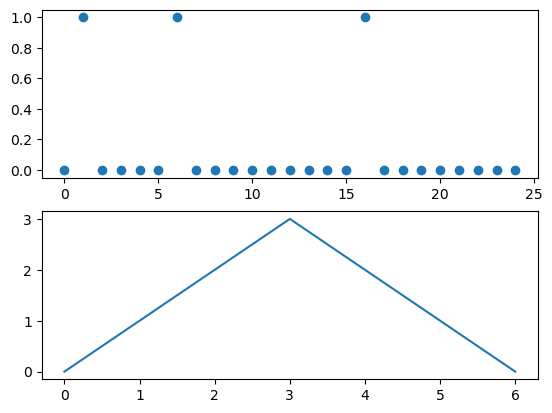

In [ ]:
Z = np.array([0, 1, 2, 3, 2, 1, 0])
lines = [1, 6, 16]
nM = 25
M = np.zeros(nM)
M[lines]=1

fig, ax = plt.subplots(2,1)
ax[0].scatter(np.arange(0,M.size,1),M)
ax[1].plot(Z)

a. In the cell below, create your own function to calculate a convolution

b. Now in the cell below, calculate and graph the convolution between $M$ and $Z$

## 2. Matrix version of a convolution

We can also write a convolution as being the dot product between a matrix representation of the mask and the profile shape

a. In the cell below, you can see that I have already created an empty matrix for the Mask array (`M_mat`). Now fill in the associated diagonals with ones. Print you matrix to make sure it is correct

Hint: As we saw in class, we can use a padded version of the `M` array to create a loop that assigns a slice of this array shifted according to the loop index. 

In [2]:
Z = np.array([0, 1, 2, 3, 2, 1, 0])
lines = [1, 6, 16]
nM = 25
M = np.zeros(nM)
M[lines]=1

# create a matrix filled with zeros for M
M_mat = np.zeros((nM, Z.size))



b. Now let's make the convolution by taking the dot product of $\bar{M}$ and $\vec{Z}$. Make a graph of the result

## 3. Inversion of the simple toy model

In the previous section, we have seen that $\vec{V}=\bar{M}\cdot\vec{Z}$. We can now 'invert' this problem, aka find the least square fit to this system of equation. 

$$\vec{Z}_\mathrm{min} = (\bar{M}^T\bar{M})^{-1} \bar{M}^T\vec{V}$$

b. Just for fun, let's check what this would look like if we were to add some noise to the data array

## 4. A more realistic example